# How to Crawl URL Website

## Mục tiêu:
- Hiểu về bố cục trang web flickr.com. <br>
- Hiểu cách hoạt động cơ bản của website. <br>
- Thiết kế class dùng để Crawl url từ website dựa vào các đặc điểm của html. <br>
- Xử lí đa luồng khi crawl url từ website. <br>
Trước tiên chúng ta sẽ quan sát bố cục của trang web này trước khi thực hiện đi sâu phân tích về cấu
trúc HTML của nó.

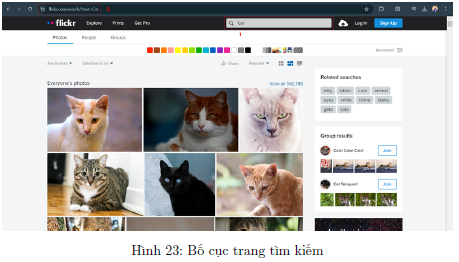

Có thể thấy flickr là trang web có bố cục khá đơn giản, khi chúng ta nhập một từ khóa tìm kiếm vào
ô search, bên dưới sẽ ngay lập tức hiển thị các hình ảnh chính xác. Và ở đây có một điểm quan trọng
nhất cần lưu ý là đường link URL (2) của trang web. Dễ dàng nhận thấy được thay vì tìm kiếm bằng ô search, chúng ta hoàn toàn có thể thay đổi từ khóa "Cat" trong đường dẫn bằng từ khóa mong muốn.
Từ đây, chúng ta có thể liên hệ tìm kiếm với trang web flickr thông qua đường link:

```bash
https://www.flickr.com/search/?text={search_term}
```

Từ đường dẫn URL, chúng ta có thể lấy được toàn bộ nội dung mà trang web hiển thị:
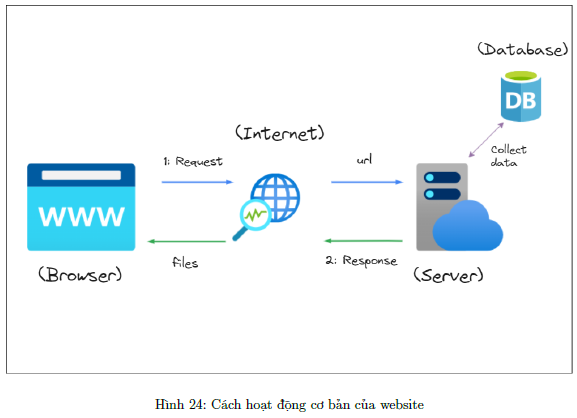

Khi chúng ta gõ một đường dẫn, hay click vào URL nào đó, browser (như Cốc cốc, chrome, brave) sẽ
gửi một yêu cầu tới server, server sẽ đọc url, xử lí yêu cầu, truy xuất xuống database lấy những thông
tin cần thiết, sau đó tổng hợp tất cả các file gửi trả lời cho browser. Trong các file đó, dĩ nhiên có file
định dạng HTML, chính là file chứa cấu trúc của toàn bộ trang web. Sau khi browser nhận được phản
hồi từ server, sẽ hiển thị tất cả thông tin dưới dạng một trang web, người dùng có thể dễ dàng tương
tác, gửi các request khác tới server thông qua browser.
Chúng ta vừa có thể tìm kiếm nội dung bằng cách thay đổi search_term trong đường link, vừa có thể
lấy được nội dung (cấu trúc HTML) của trang đó thông qua việc gửi request tới server, như vậy, chúng
ta chỉ cần xử lí thông tin ở trong file HTML nhận lại từ server để lấy ra thông tin về ảnh cần thu thập.
Để phân tích cấu trúc trang web thông qua HTML:
- Bước 1: Nhấn F12 để bật công cụ dev tool của browser.
- Bước 2: Click vào vị trí số 1 ở ảnh bên dưới, sau đó trỏ tới 1 bức ảnh bất kì (2).
- Bước 3: Quan sát cấu trúc HTML chứa đường link của bức ảnh (3).

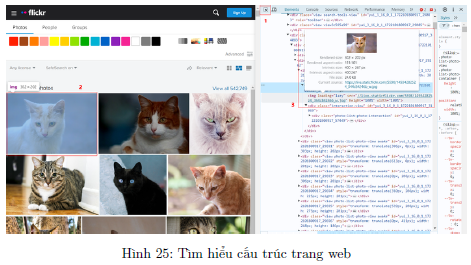

( Các bức ảnh trên các trang web thường được lưu trữ trên các server riêng biệt. Khi bạn truy cập một
trang web, trang web đó sẽ sử dụng URL của bức ảnh để gửi yêu cầu (request) đến các server chứa bức
ảnh. Server sau đó sẽ gửi bức ảnh trở lại để hiển thị trên trang web. Nói cách khác, trang web chỉ lưu
trữ đường dẫn đến bức ảnh, còn bức ảnh thực tế được lưu trữ và phục vụ từ server khác.)
Một cách khác để nhìn thấy rõ ràng hơn cấu trúc html của trang web, bấm tổ hợp phím Ctrl + U. Và
như quan sát, tất cả các đường dẫn hình ảnh đều nằm trong khối mã gồm thẻ ```<img/>``` như bên dưới:
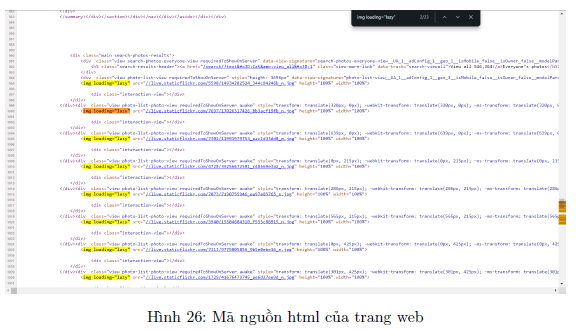

In [2]:
!pip install tqdm
!apt-get update
!apt-get install -y wget
!pip install selenium
!apt-get install -y chromium-browser
!apt-get install -y chromium-chromedriver


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
    --------------------------------------- 0.1/9.4 MB 3.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/9.4 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.4 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.4 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.4 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.4 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.4 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.4 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.4 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.4 MB 2.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/9.4 MB 2.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.4 MB 2.3 MB/s eta 0:00:04
   ------ ---------


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install tqdm
!pip install selenium


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from bs4 import BeautifulSoup # For parsing HTML content
from urllib.parse import urljoin, urlparse # For handling URLs
import urllib.request # For making HTTP requests
import time # For handling time-related operations
import os # For interacting with the operating system (relate to dir, folder, file)
from tqdm import tqdm # For displaying progress bars (visualize progress)
import concurrent.futures # For multi-threading
import json # For writing to a text file
from PIL import Image # For handling images

In [ ]:
class UrlScraper:
    # Constructor
    def __init__(self, url_template, max_images=50, max_workers=4):
        self.url_template = url_template  # Link crawl
        self.max_images = max_images  # Max images
        self.max_workers = max_workers  # Thread

        self.setup_environment()  # Call for setup environment

    # Set up environment for selenium (Mac version)
    # def setup_environment(self):
    #     os.environ['PATH'] += ':/usr/lib/chromium-browser/' # Replace with C:\Chrome_Selenium\chrome-win64
    #     os.environ['PATH'] += ':/usr/lib/chromium-browser/chromedriver/' # Replace with C:\Chrome_Selenium\chromedriver-win64
    # Windows Version
    def setup_environment(self):
        os.environ['PATH'] += r';C:\Chrome_Selenium\chrome-win64'  # Windows path
        os.environ['PATH'] += r';C:\Chrome_Selenium\chromedriver-win64'  # Windows path
    
    def get_url_images(self, term):
        """
        Crawl the urls of images by term

        Parameters:
        term (str): The name of animal, plant, scenery, furniture

        Returns:
        urls (list): List of urls of images
        """

        # Initialize Chrome driver
        options = webdriver.ChromeOptions()
        options.add_argument('--headless')
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        driver = webdriver.Chrome(options=options)

        url = self.url_template.format(search_term=term)
        driver.get(url)

        # Start crawl urls of image like brute force - the same mechanism with this but add some feature
        urls = []
        more_content_available = True

        pbar = tqdm(total=self.max_images, desc=f"Fetching images for {term}")  # Set up for visualizing progress

        while len(urls) < self.max_images and more_content_available:
            soup = BeautifulSoup(driver.page_source, "html.parser")
            img_tags = soup.find_all("img")

            for img in img_tags:
                if len(urls) >= self.max_images:
                    break
                if 'src' in img.attrs:
                    href = img.attrs['src']
                    img_path = urljoin(url, href)
                    img_path = img_path.replace("_m.jpg", "_b.jpg").replace("_n.jpg", "_b.jpg").replace("_w.jpg", "_b.jpg")
                    if img_path == "https://combo.staticflickr.com/ap/build/images/getty/IStock_corporate_logo.svg":
                        continue
                    urls.append(img_path)
                    pbar.update(1)

            try:
                load_more_button = WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, '//button[@id="yui_3_16_0_1_1721642285931_28620"]'))
                )
                load_more_button.click()
                time.sleep(2)
            except:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)

            new_soup = BeautifulSoup(driver.page_source, "html.parser")
            new_img_tags = new_soup.find_all("img", loading="lazy")
            if len(new_img_tags) == len(img_tags):
                more_content_available = False
            img_tags = new_img_tags

        pbar.close()
        driver.quit()
        return urls

    def scrape_urls(self, categories):
        """
        Call get_url_images method to get all urls of any object in categories

        Parameter:
        categories (dictionary): the dict of all objects we need to collect images with format
        categories{"name_object": [value1, value2, ...]}

        Returns:
        all_urls (dictionary): Dictionary of urls of images
        """
        all_urls = {category: {} for category in categories}

        # Handle multi-threading for efficient installation
        with concurrent.futures.ThreadPoolExecutor(max_workers=self.max_workers) as executor:
            future_to_term = {executor.submit(self.get_url_images, term): (category, term)
                              for category, terms in categories.items() for term in terms}

            for future in tqdm(concurrent.futures.as_completed(future_to_term), total=len(future_to_term), desc="Overall Progress"):
                category, term = future_to_term[future]
                try:
                    urls = future.result()
                    all_urls[category][term] = urls
                    print(f"\nNumber of images retrieved for {term}: {len(urls)}")
                except Exception as exc:
                    print(f"\n{term} generated an exception: {exc}")
        return all_urls

    def save_to_file(self, data, filename):
        """
        Save the data to a JSON file.

        Parameters:
        data (dict): The data to be saved.
        filename (str): The name of the JSON file.

        Returns:
        None
        """
        with open(filename, 'w') as file:
            json.dump(data, file, indent=4)
        print(f"Data saved to {filename}")

categories = {
    "animal": [
        "Monkey", "Elephant", "Cows", "Cat", "Dog", "Bear", "Fox", "Civet", "Pangolins",
        "Rabbit", "Bats", "Whale", "Cock", "Owl", "Flamingo", "Lizard", "Turtle", "Snake",
        "Frog", "Fish", "Shrimp", "Crab", "Snail", "Coral", "Jellyfish", "Butterfly", "Flies",
        "Mosquito", "Ants", "Cockroaches", "Spider", "Scorpion", "Tiger", "Bird", "Horse",
        "Pig", "Alligator", "Alpaca", "Anteater", "Donkey", "Bee", "Buffalo", "Camel",
        "Caterpillar", "Cheetah", "Chicken", "Dragonfly", "Duck", "Panda", "Giraffe"
    ],
    "plant": [
        "Bamboo", "Apple", "Apricot", "Banana", "Bean", "Wildflower", "Flower", "Mushroom",
        "Weed", "Fern", "Reed", "Shrub", "Moss", "Grass", "Palmtree", "Corn", "Tulip",
        "Rose", "Clove", "Dogwood", "Durian", "Ferns", "Fig", "Flax", "Frangipani",
        "Lantana", "Hibiscus", "Bougainvillea", "Pea", "OrchidTree", "RangoonCreeper",
        "Jackfruit", "Cottonplant", "Corneliantree", "Coffeeplant", "Coconut", "Wheat",
        "Watermelon", "Radish", "Carrot"
    ],
    "furniture": [
        "Bed", "Cabinet", "Chair", "Chests", "Clock", "Desks", "Table", "Piano", "Bookcase",
        "Umbrella", "Clothes", "Cart", "Sofa", "Ball", "Spoon", "Bowl", "Fridge", "Pan",
        "Book"
    ],
    "scenery": [
        "Cliff", "Bay", "Coast", "Mountains", "Forests", "Waterbodies", "Lake", "Desert",
        "Farmland", "River", "Hedges", "Plain", "Sky", "Cave", "Cloud", "Flowergarden",
        "Glacier", "Grassland", "Horizon", "Lighthouse", "Plateau", "Savannah", "Valley",
        "Volcano", "Waterfall"
    ]
}

urltopic = {"flickr": "https://www.flickr.com/search/?text={search_term}"}
scraper = UrlScraper(url_template=urltopic["flickr"], max_images=20, max_workers=5)
image_urls = scraper.scrape_urls(categories)
#scraper.save_to_file(image_urls, ’image_urls.json’)

Fetching images for Monkey:   0%|                                                                                                                                                    | 0/20 [00:00<?, ?it/s]

Fetching images for Cat:   0%|                                                                                                                                                       | 0/20 [00:00<?, ?it/s]

Fetching images for Cat:   5%|███████▏                                                                                                                                       | 1/20 [00:00<00:02,  9.49it/s]


Fetching images for Elephant:   0%|                                                                                                                                                  | 0/20 [00:00<?, ?it/s]


Fetching images for Elephant:   5%|██████▉                                                                                                                                   |


Number of images retrieved for Monkey: 20


Overall Progress:   1%|██▏                                                                                                                                                  | 2/134 [00:31<29:53, 13.59s/it]


Number of images retrieved for Cat: 20


Overall Progress:   2%|███▎                                                                                                                                                 | 3/134 [00:32<16:21,  7.49s/it]


Number of images retrieved for Elephant: 20

Number of images retrieved for Cows: 20



Overall Progress:   4%|█████▌                                                                                                                                               | 5/134 [00:34<08:43,  4.06s/it]


Number of images retrieved for Dog: 20




Fetching images for Fox:   0%|                                                                                                                                                       | 0/20 [00:00<?, ?it/s]

Fetching images for Fox:   5%|███████▏                                                                                                                                       | 1/20 [00:00<00:02,  7.56it/s]


Fetching images for Pangolins:   0%|                                                                                                                                                 | 0/20 [00:00<?, ?it/s]


Fetching images for Pangolins:   5%|██████▊                                                                                                                                  | 1/20 [00:00<00:02,  8.02it/s]



Fetching images for Rabbit:   0%|                                                                                                                                         


Number of images retrieved for Bear: 20


Fetching images for Civet: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.58it/s]

Overall Progress:   5%|███████▊                                                                                                                                             | 7/134 [00:56<14:46,  6.98s/it]


Number of images retrieved for Fox: 20


Overall Progress:   6%|████████▉                                                                                                                                            | 8/134 [00:59<11:59,  5.71s/it]


Number of images retrieved for Rabbit: 20


Overall Progress:   7%|██████████                                                                                                                                           | 9/134 [01:00<09:10,  4.40s/it]


Number of images retrieved for Pangolins: 20




Overall Progress:   7%|███████████                                                                                                                                         | 10/134 [01:03<08:05,  3.91s/it]


Number of images retrieved for Civet: 20





Fetching images for Cock:   0%|                                                                                                                                                      | 0/20 [00:00<?, ?it/s]



Fetching images for Owl:   0%|                                                                                                                                                       | 0/20 [00:00<?, ?it/s]




Fetching images for Flamingo:   0%|                                                                                                                                                  | 0/20 [00:00<?, ?it/s]




Overall Progress:   8%|████████████▏                                                                                                                                       | 11/134 [01:16<13:43,  6.69s/it]


Number of images retrieved for Bats: 20


Fetching images for Flamingo: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.55it/s]

Overall Progress:   9%|█████████████▎                                                                                                                                      | 12/134 [01:22<12:41,  6.24s/it]


Number of images retrieved for Whale: 20


Overall Progress:  10%|██████████████▎                                                                                                                                     | 13/134 [01:24<10:20,  5.13s/it]


Number of images retrieved for Cock: 20




Fetching images for Turtle:   0%|                                                                                                                                                    | 0/20 [00:00<?, ?it/s]

Overall Progress:  10%|███████████████▍                                                                                                                                    | 14/134 [01:27<08:53,  4.44s/it]


Number of images retrieved for Owl: 20


Overall Progress:  11%|████████████████▌                                                                                                                                   | 15/134 [01:28<06:55,  3.49s/it]


Number of images retrieved for Flamingo: 20





Fetching images for Snake:   0%|                                                                                                                                                     | 0/20 [00:00<?, ?it/s]


Fetching images for Snake:   5%|███████                                                                                                                                      | 1/20 [00:00<00:02,  7.28it/s]



Fetching images for Frog:   0%|                                                                                                                                                      | 0/20 [00:00<?, ?it/s]



Fetching images for Frog:   5%|███████                                                                                                                                       | 1/20 [00:00<00:02,  6.65it/s]




Fetching images for Fish:   0%|                                                                                                                                      


Number of images retrieved for Lizard: 20


Overall Progress:  13%|██████████████████▊                                                                                                                                 | 17/134 [01:43<10:13,  5.24s/it]


Number of images retrieved for Turtle: 20


Fetching images for Fish: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]

Fetching images for Crab:   5%|███████                                                                                                                                       | 1/20 [00:00<00:04,  4.32it/s]

Fetching images for Shrimp:   0%|                                                                                                                                                    | 0/20 [00:00<?, ?it/s]

Overall Progress:  13%|███████████████████▉                                                                                                                                | 18/134 [01:49<10:18,  5.33s/it]


Number of images retrieved for Snake: 20


Overall Progress:  14%|████████████████████▉                                                                                                                               | 19/134 [01:51<08:31,  4.45s/it]


Number of images retrieved for Frog: 20


Overall Progress:  15%|██████████████████████                                                                                                                              | 20/134 [01:52<06:23,  3.37s/it]


Number of images retrieved for Fish: 20





Fetching images for Snail:   0%|                                                                                                                                                     | 0/20 [00:00<?, ?it/s]


Fetching images for Snail:   5%|███████                                                                                                                                      | 1/20 [00:00<00:03,  5.05it/s]



Fetching images for Coral:   0%|                                                                                                                                                     | 0/20 [00:00<?, ?it/s]



Fetching images for Coral:   5%|███████                                                                                                                                      | 1/20 [00:00<00:02,  7.19it/s]




Fetching images for Jellyfish:   0%|                                                                                                                                 


Number of images retrieved for Shrimp: 20

Number of images retrieved for Crab: 20


Overall Progress:  17%|█████████████████████████▍                                                                                                                          | 23/134 [02:14<09:44,  5.26s/it]


Number of images retrieved for Snail: 20



Fetching images for Butterfly:   5%|██████▊                                                                                                                                  | 1/20 [00:00<00:05,  3.35it/s]

Fetching images for Flies:   0%|                                                                                                                                                     | 0/20 [00:00<?, ?it/s]

Overall Progress:  18%|██████████████████████████▌                                                                                                                         | 24/134 [02:18<08:43,  4.76s/it]


Number of images retrieved for Jellyfish: 20


Overall Progress:  19%|███████████████████████████▌                                                                                                                        | 25/134 [02:19<06:48,  3.74s/it]


Number of images retrieved for Coral: 20





Fetching images for Mosquito:   0%|                                                                                                                                                  | 0/20 [00:00<?, ?it/s]


Fetching images for Mosquito:   5%|██████▉                                                                                                                                   | 1/20 [00:00<00:04,  4.06it/s]



Fetching images for Ants:   0%|                                                                                                                                                      | 0/20 [00:00<?, ?it/s]



Fetching images for Ants:   5%|███████                                                                                                                                       | 1/20 [00:00<00:03,  5.71it/s]




Fetching images for Cockroaches:   0%|                                                                                                                               


Number of images retrieved for Butterfly: 20


Overall Progress:  20%|█████████████████████████████▊                                                                                                                      | 27/134 [02:37<10:10,  5.70s/it]


Number of images retrieved for Flies: 20



Fetching images for Spider:   5%|███████                                                                                                                                     | 1/20 [00:00<00:05,  3.66it/s]


Number of images retrieved for Mosquito: 20




Fetching images for Scorpion:   0%|                                                                                                                                                  | 0/20 [00:00<?, ?it/s]

Fetching images for Scorpion:   5%|██████▉                                                                                                                                   | 1/20 [00:00<00:14,  1.29it/s]


Overall Progress:  22%|████████████████████████████████                                                                                                                    | 29/134 [02:45<08:48,  5.04s/it]


Number of images retrieved for Ants: 20


Overall Progress:  22%|█████████████████████████████████▏                                                                                                                  | 30/134 [02:46<06:16,  3.62s/it]


Number of images retrieved for Cockroaches: 20





Fetching images for Tiger:   5%|███████                                                                                                                                      | 1/20 [00:02<00:47,  2.49s/it]



Fetching images for Bird:   0%|                                                                                                                                                      | 0/20 [00:00<?, ?it/s]



Fetching images for Spider: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.52it/s]

Overall Progress:  23%|██████████████████████████████████▏                                                                                                                 | 31/134 [03:03<13:02,  7.60s/it]


Number of images retrieved for Spider: 20


Overall Progress:  24%|███████████████████████████████████▎                                                                                                                | 32/134 [03:06<10:37,  6.25s/it]


Number of images retrieved for Scorpion: 20


Overall Progress:  25%|████████████████████████████████████▍                                                                                                               | 33/134 [03:10<09:31,  5.66s/it]


Number of images retrieved for Tiger: 20



Fetching images for Alligator:   0%|                                                                                                                                                 | 0/20 [00:00<?, ?it/s]

Fetching images for Pig:   0%|                                                                                                                                                       | 0/20 [00:00<?, ?it/s]

Overall Progress:  25%|█████████████████████████████████████▌                                                                                                              | 34/134 [03:16<09:29,  5.69s/it]


Number of images retrieved for Bird: 20



Overall Progress:  26%|██████████████████████████████████████▋                                                                                                             | 35/134 [03:23<10:18,  6.24s/it]


Number of images retrieved for Horse: 20


Fetching images for Alligator: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:18<00:00,  1.06it/s]

Fetching images for Alpaca:   5%|███████                                                                                                                                     | 1/20 [00:01<00:35,  1.88s/it]

Fetching images for Anteater:   0%|                                                                                                                                                  | 0/20 [00:00<?, ?it/s]

Fetching images for Alpaca: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.26it/s]



Fetching images for Donkey:   0%|                                                                                                                                             


Number of images retrieved for Pig: 20


Overall Progress:  28%|████████████████████████████████████████▊                                                                                                           | 37/134 [03:56<16:29, 10.20s/it]


Number of images retrieved for Alligator: 20


Overall Progress:  28%|█████████████████████████████████████████▉                                                                                                          | 38/134 [04:02<14:02,  8.77s/it]


Number of images retrieved for Anteater: 20


Overall Progress:  29%|███████████████████████████████████████████                                                                                                         | 39/134 [04:17<16:45, 10.58s/it]


Number of images retrieved for Donkey: 20



Fetching images for Bee:   5%|███████▏                                                                                                                                       | 1/20 [00:00<00:04,  4.66it/s]

Fetching images for Buffalo:   0%|                                                                                                                                                   | 0/20 [00:00<?, ?it/s]

Fetching images for Buffalo:   5%|██████▉                                                                                                                                    | 1/20 [00:00<00:15,  1.25it/s]


Fetching images for Bee: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.48it/s]



Overall Progress:  30%|████████████████████████████████████████████▏                                                                                                       |


Number of images retrieved for Alpaca: 20


Overall Progress:  31%|█████████████████████████████████████████████▎                                                                                                      | 41/134 [04:56<21:52, 14.12s/it]


Number of images retrieved for Bee: 20


Overall Progress:  31%|██████████████████████████████████████████████▍                                                                                                     | 42/134 [05:09<21:22, 13.94s/it]


Number of images retrieved for Buffalo: 20



Fetching images for Caterpillar: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:19<00:00,  1.05it/s]

Overall Progress:  33%|████████████████████████████████████████████████▌                                                                                                   | 44/134 [05:44<21:16, 14.19s/it]


Number of images retrieved for Caterpillar: 20

Number of images retrieved for Camel: 20


Fetching images for Cheetah: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.44it/s]

Fetching images for Chicken: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.20it/s]

Overall Progress:  34%|█████████████████████████████████████████████████▋                                                                                                  | 45/134 [06:27<33:35, 22.65s/it]


Number of images retrieved for Cheetah: 20


Fetching images for Dragonfly: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.32it/s]

Fetching images for Duck:   5%|███████                                                                                                                                       | 1/20 [00:01<00:29,  1.54s/it]

Fetching images for Panda:   0%|                                                                                                                                                     | 0/20 [00:00<?, ?it/s]

Overall Progress:  34%|██████████████████████████████████████████████████▊                                                                                                 | 46/134 [06:47<32:13, 21.97s/it]


Number of images retrieved for Dragonfly: 20


Overall Progress:  35%|███████████████████████████████████████████████████▉                                                                                                | 47/134 [06:48<22:33, 15.56s/it]


Number of images retrieved for Chicken: 20


Overall Progress:  36%|█████████████████████████████████████████████████████                                                                                               | 48/134 [07:12<25:57, 18.11s/it]


Number of images retrieved for Panda: 20



Overall Progress:  37%|██████████████████████████████████████████████████████                                                                                              | 49/134 [07:43<31:02, 21.91s/it]:00<00:16,  1.14it/s]


Number of images retrieved for Duck: 20


Fetching images for Giraffe: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:14<00:00,  1.34it/s]

Overall Progress:  37%|███████████████████████████████████████████████████████▏                                                                                            | 50/134 [08:08<32:19, 23.08s/it]:00<00:05,  3.33it/s]


Number of images retrieved for Giraffe: 20


Fetching images for Apple: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.49it/s]

Overall Progress:  38%|████████████████████████████████████████████████████████▎                                                                                           | 51/134 [08:37<34:05, 24.64s/it]:02<00:49,  2.62s/it]


Number of images retrieved for Apple: 20
